# Regresión Logística Decision Tree

---

In [46]:
# Tratamiento de datos
import numpy as np
import pandas as pd

# Gráficos
import matplotlib.pyplot as plt
import seaborn as sns

# Modelado y evaluación
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score , cohen_kappa_score, roc_curve,roc_auc_score
from sklearn.model_selection import GridSearchCV

# Configuración warnings
import warnings
warnings.filterwarnings('ignore')

Hasta ahora hemos ajustado el modelo usando una Regresión Logística, pero como hemos aprendido, podemos usar el Decision Tree en este tipo de problemas. Los objetivos de este pair programming :


---

## Modelo 1: codificado y estandarizado

In [47]:
df1 = pd.read_csv("../files_rl/3-heart-encoding-estandarizado.csv", index_col=0)
df1.head(2)

,fastingbs,restingecg,exerciseangina,st_slope,heartdisease,sex_F,sex_M,chest_ASY,chest_ATA,chest_NAP,chest_TA,age,restingbp,maxhr,oldpeak,cholesterol
0,0,1,1,3,0,0,1,0,1,0,0,-1.076923,0.5,0.944444,-0.400000,0.870840
1,0,1,1,1,1,1,0,0,0,1,0,-0.384615,1.5,0.500000,0.266667,-1.185764


In [48]:
X1 = df1.drop("heartdisease", axis = 1)
y1 = df1["heartdisease"]

In [49]:
# separamos en train y test
x_train1, x_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size = 0.2, random_state = 42)

In [50]:
# creamos el objeto del modelo
arbol = DecisionTreeClassifier(random_state =0)

# ajustamos el modelo
arbol.fit(x_train1, y_train1)

DecisionTreeClassifier(random_state=0)

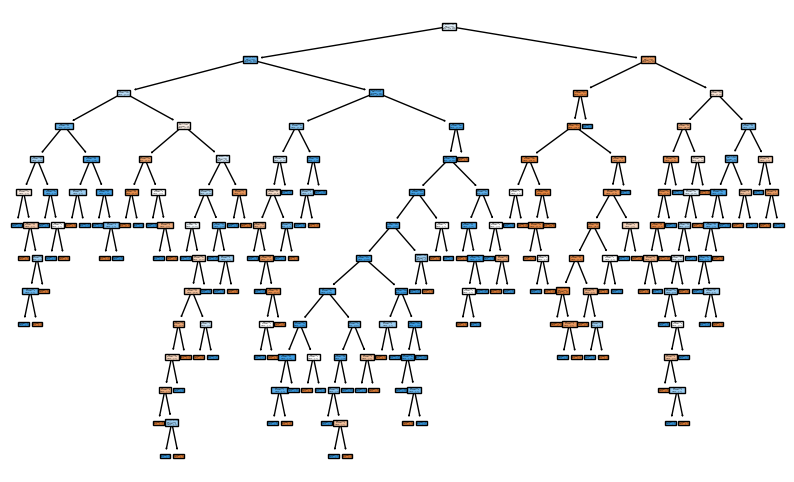

In [51]:
fig = plt.figure(figsize = (10,6))
tree.plot_tree(arbol, feature_names = x_train1.columns, filled = True)
plt.show()

### 1.1 Ajustad un modelo de Decision Tree a nuestros datos.


In [52]:
# max features.

max_features = np.sqrt(len(x_train1.columns))
max_features

3.872983346207417

In [53]:
# max depth

print(arbol.tree_.max_depth)

13


In [54]:
# hacemos las predicciones sobre los dos set de datos el X_test y el X_train
y_pred_test_esta = arbol.predict(x_test1)
y_pred_train_esta = arbol.predict(x_train1)

In [55]:
def metricas(clases_reales_test, clases_predichas_test, clases_reales_train, clases_predichas_train, modelo):
    
    # para el test
    accuracy_test = accuracy_score(clases_reales_test, clases_predichas_test)
    precision_test = precision_score(clases_reales_test, clases_predichas_test)
    recall_test = recall_score(clases_reales_test, clases_predichas_test)
    f1_test = f1_score(clases_reales_test, clases_predichas_test)
    kappa_test = cohen_kappa_score(clases_reales_test, clases_predichas_test)

    # para el train
    accuracy_train = accuracy_score(clases_reales_train, clases_predichas_train)
    precision_train = precision_score(clases_reales_train, clases_predichas_train)
    recall_train = recall_score(clases_reales_train, clases_predichas_train)
    f1_train = f1_score(clases_reales_train, clases_predichas_train)
    kappa_train = cohen_kappa_score(clases_reales_train, clases_predichas_train)
    

    
    df = pd.DataFrame({"accuracy": [accuracy_test, accuracy_train], 
                       "precision": [precision_test, precision_train],
                       "recall": [recall_test, recall_train], 
                       "f1": [f1_test, f1_train],
                       "kapppa": [kappa_test, kappa_train],
                       "set": ["test", "train"]})
    
    df["modelo"] = modelo
    return df

In [56]:
# sacamos las métricas para ver si hay overfitting o unerfitting, para modificar la profundidad en función de estos resultados

dt_results1 = metricas(y_test1, y_pred_test_esta, y_train1, y_pred_train_esta, "Decission Tree Esta I")
dt_results1

,accuracy,precision,recall,f1,kapppa,set,modelo
0,0.804348,0.895833,0.767857,0.826923,0.604962,test,Decission Tree Esta I
1,1.000000,1.000000,1.000000,1.000000,1.000000,train,Decission Tree Esta I


In [57]:
param = {"max_depth": [2,4, 6, 10], # teniendo en cuenta que teníamos overfitting tendremos que reducir la profundidad del modelo.
        "max_features": [1,2,3,4],#  Ponemos como límite el 4 ya que es el resultado de la raiz cuadrada. 
        "min_samples_split": [10, 50, 100],
        "min_samples_leaf": [10,50,100]} 


In [58]:
gs = GridSearchCV(
            estimator=DecisionTreeClassifier(random_state= 42), # tipo de modelo que queremos hacer
            param_grid= param, # que hiperparámetros queremos que testee
            cv=10, # crossvalidation.
            verbose=-1) # para que no nos printee ningún mensaje en pantalla

In [59]:
# ajustamos el modelo que acabamos de definir en el GridSearch

gs.fit(x_train1, y_train1)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [2, 4, 6, 10],
                         'max_features': [1, 2, 3, 4],
                         'min_samples_leaf': [10, 50, 100],
                         'min_samples_split': [10, 50, 100]},
             verbose=-1)

In [60]:
mejor_modelo = gs.best_estimator_
mejor_modelo

DecisionTreeClassifier(max_depth=4, max_features=3, min_samples_leaf=10,
                       min_samples_split=10, random_state=42)

`Este método nos esta diciendo que el mejor modelo es aquel que tiene una profundidad de 4, que usa 3 variables predictoras para construir el modelo y que tiene  un min_samples_leaf y un min_samples_split de 10. `


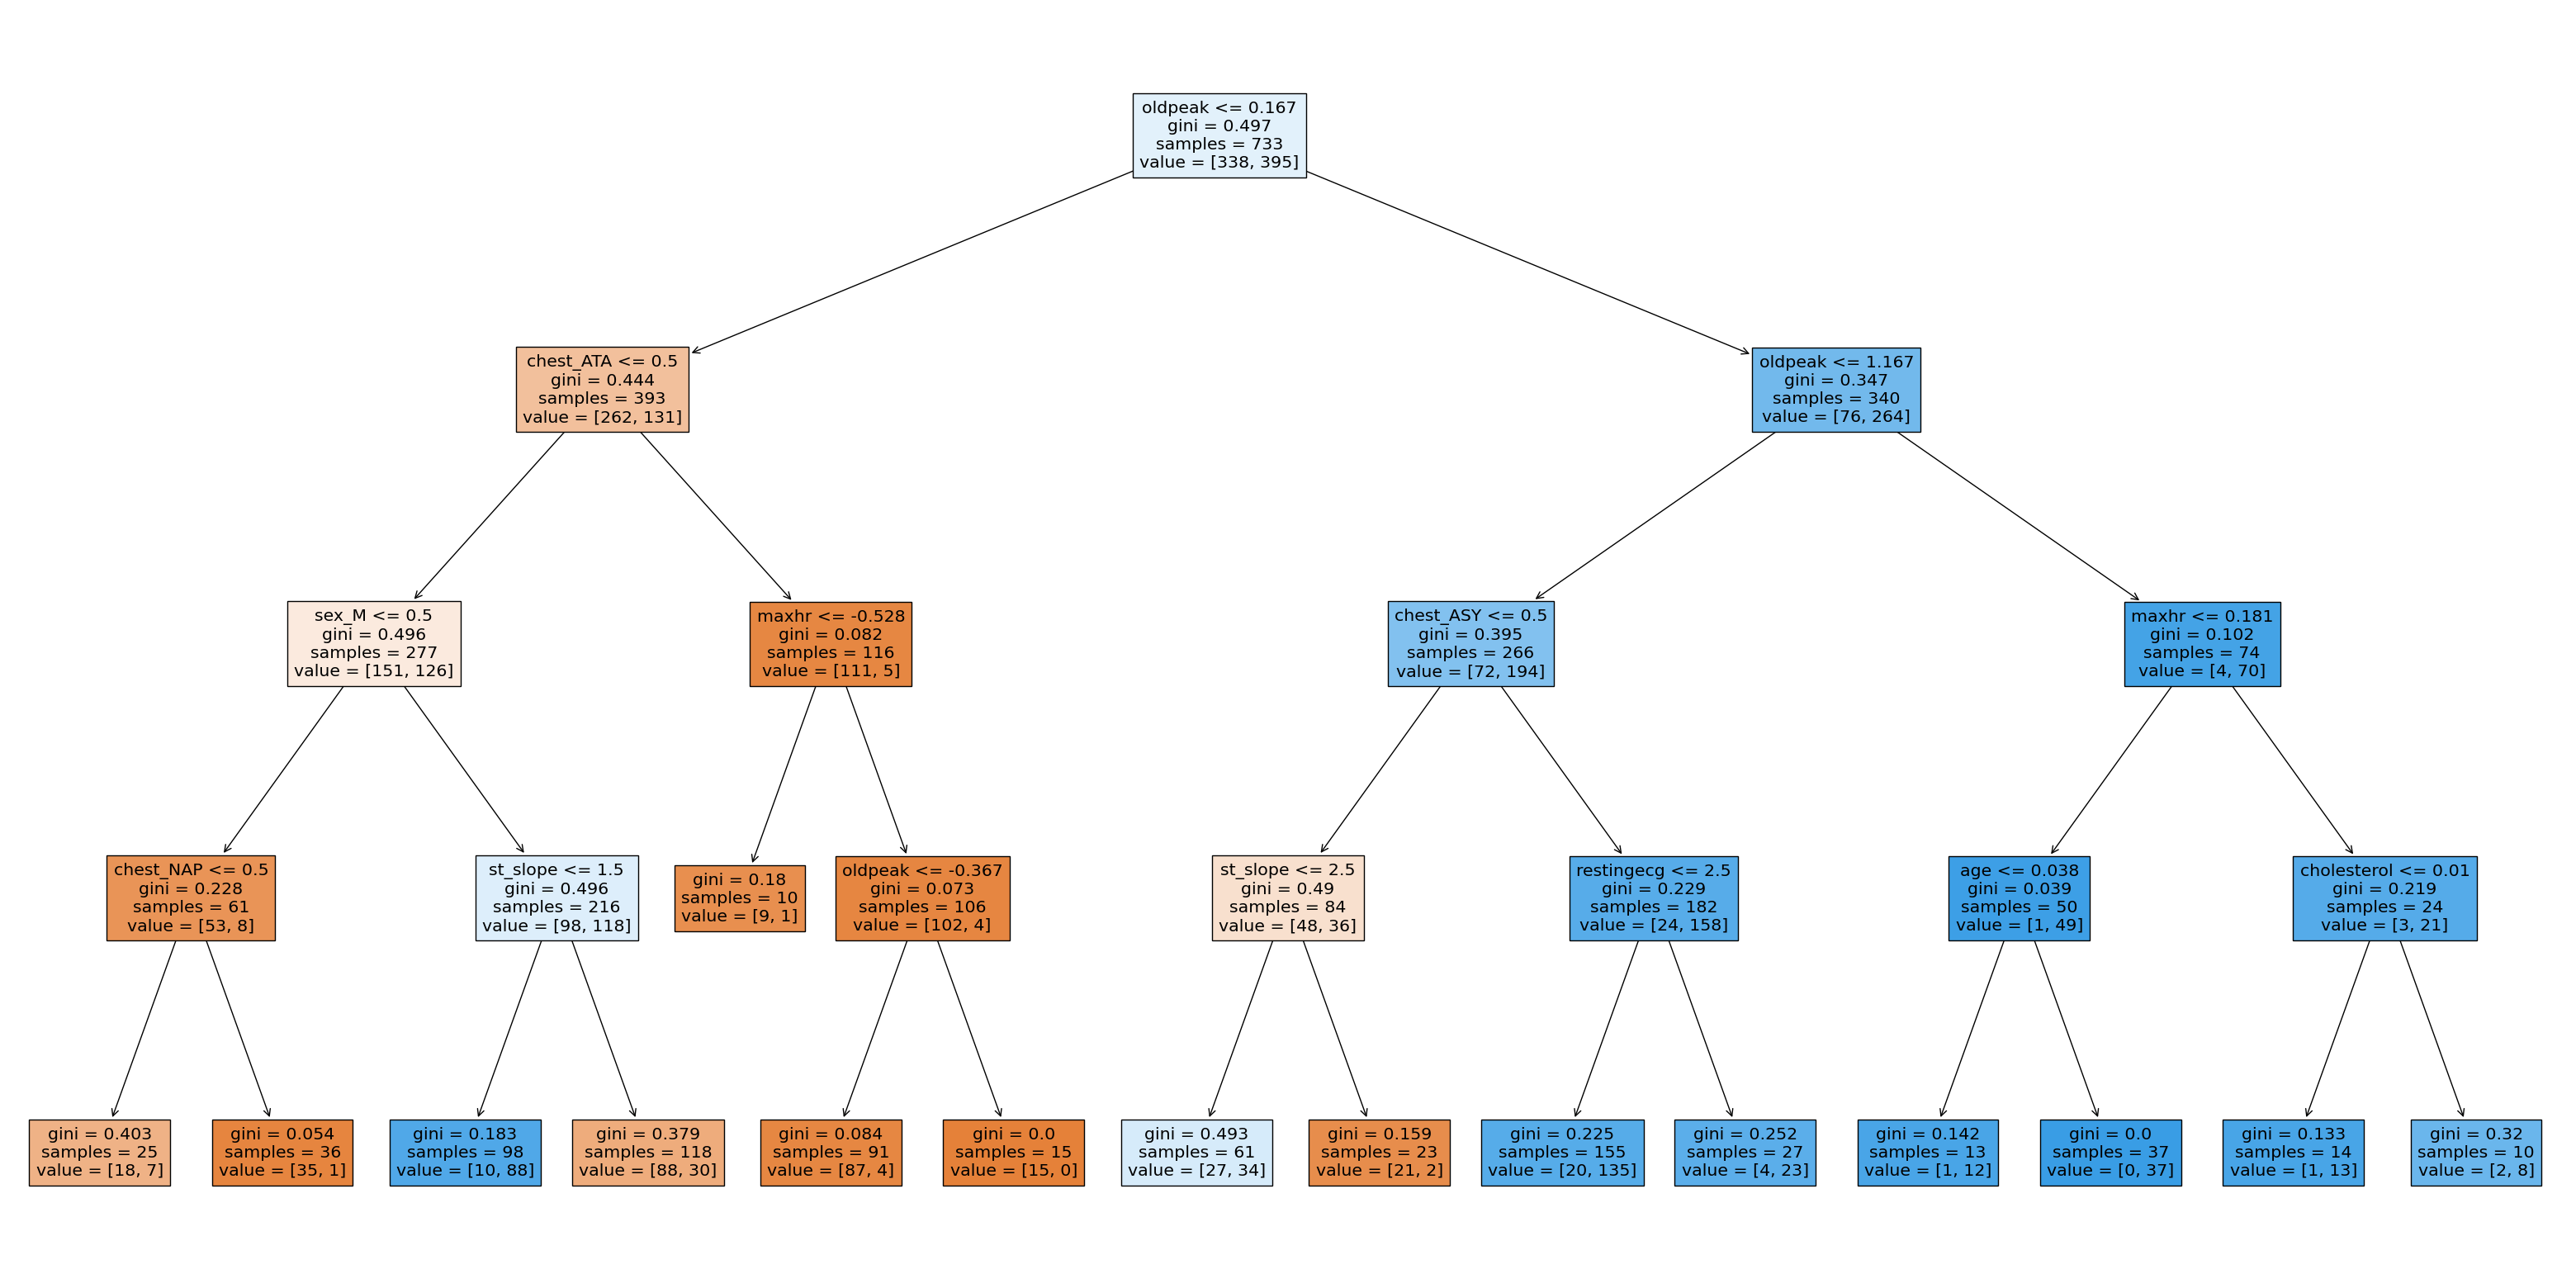

In [61]:
# veamos ahora nuestro arbol

fig = plt.figure(figsize=(40, 20))
tree.plot_tree(mejor_modelo, feature_names=x_train1.columns, filled=True);

### 1.2 Calculad las métricas a nuestro nuevo modelo.


In [62]:
y_pred_test_esta1 = mejor_modelo.predict(x_test1)
y_pred_train_esta1 = mejor_modelo.predict(x_train1)

In [63]:
dt_result_est = metricas(y_test1, y_pred_test_esta1, y_train1,  y_pred_train_esta1, "Decision tree Esta I")
dt_result_est

,accuracy,precision,recall,f1,kapppa,set,modelo
0,0.798913,0.857143,0.803571,0.829493,0.585080,test,Decision tree Esta I
1,0.849932,0.843373,0.886076,0.864198,0.696743,train,Decision tree Esta I


### 3. Comparad las métricas con el modelo hecho hasta ahora. ¿Cuál es mejor?


In [64]:
df_metricas = pd.read_csv("../files_rl/1-metricas-rl.csv", index_col=0)
df_metricas

,accuracy,precision,recall,f1,kapppa,set,modelo
0,0.847826,0.849315,0.861111,0.855172,0.694883,test,Regresión logistica Est-Cod
1,0.868955,0.890756,0.876033,0.883333,0.733891,train,Regresión logistica Est-Cod
0,0.865942,0.885057,0.900585,0.892754,0.714046,test,Regresión logistica Cod
1,0.861154,0.862170,0.875000,0.868538,0.721447,train,Regresión logistica Cod


In [65]:
metricas_2= pd.concat([df_metricas,dt_result_est],axis=0)
metricas_2

,accuracy,precision,recall,f1,kapppa,set,modelo
0,0.847826,0.849315,0.861111,0.855172,0.694883,test,Regresión logistica Est-Cod
1,0.868955,0.890756,0.876033,0.883333,0.733891,train,Regresión logistica Est-Cod
0,0.865942,0.885057,0.900585,0.892754,0.714046,test,Regresión logistica Cod
1,0.861154,0.862170,0.875000,0.868538,0.721447,train,Regresión logistica Cod
0,0.798913,0.857143,0.803571,0.829493,0.585080,test,Decision tree Esta I
1,0.849932,0.843373,0.886076,0.864198,0.696743,train,Decision tree Esta I


---

## Modelo 2: codificado SIN estandarizar

In [80]:
df2 = pd.read_csv("../files_rl/2-heart-encoding.csv", index_col=0)
df2.head(2)

,age,restingbp,fastingbs,restingecg,maxhr,exerciseangina,oldpeak,st_slope,heartdisease,cholesterol,sex_F,sex_M,chest_ASY,chest_ATA,chest_NAP,chest_TA
0,40,140,0,1,172,1,0.0,3,0,289.0,0,1,0,1,0,0
1,49,160,0,1,156,1,1.0,1,1,180.0,1,0,0,0,1,0


In [81]:
X2 = df2.drop("heartdisease", axis = 1)
y2 = df2["heartdisease"]

In [82]:
x_train2, x_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size = 0.2, random_state = 42)

In [83]:
# creamos el objeto del modelo
arbol2 = DecisionTreeClassifier(random_state =0)

# ajustamos el modelo
arbol2.fit(x_train2, y_train2)

DecisionTreeClassifier(random_state=0)

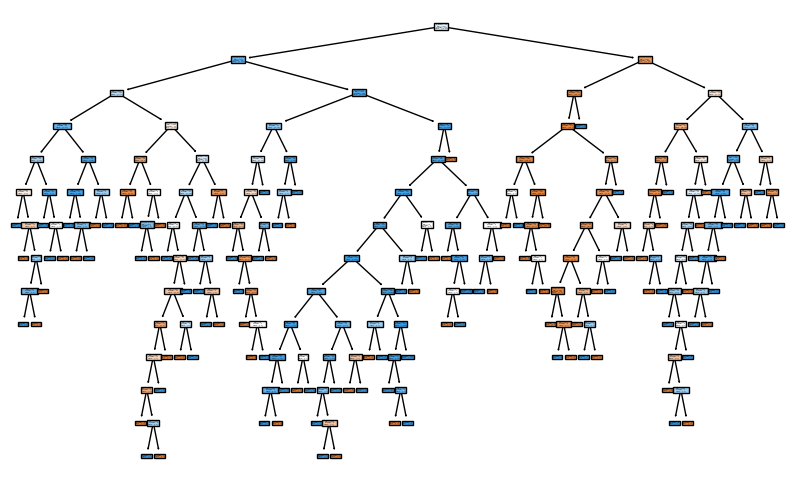

In [84]:
fig = plt.figure(figsize = (10,6))
tree.plot_tree(arbol2, feature_names = x_train2.columns, filled = True)
plt.show()

### 2.1. Ajustad un modelo de Decision Tree a nuestros datos.

In [85]:
# max features.

max_features2 = np.sqrt(len(x_train2.columns))
max_features2

3.872983346207417

In [86]:
# max depth

print(arbol2.tree_.max_depth)

13


In [87]:
param2 = {"max_depth": [2,4, 6, 10], # teniendo en cuenta que teníamos overfitting tendremos que reducir la profundidad del modelo.
        "max_features": [1,2,3,4],#  Ponemos como límite el 4 ya que es el resultado de la raiz cuadrada. 
        "min_samples_split": [10, 50, 100],
        "min_samples_leaf": [10,50,100]} 

In [88]:
gs2= GridSearchCV(
            estimator=DecisionTreeClassifier(random_state= 42), # tipo de modelo que queremos hacer
            param_grid= param2, # que hiperparámetros queremos que testee
            cv=10, # crossvalidation.
            verbose=-1) # para que no nos printee ningún mensaje en pantalla

In [89]:
gs2.fit(x_train2, y_train2)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [2, 4, 6, 10],
                         'max_features': [1, 2, 3, 4],
                         'min_samples_leaf': [10, 50, 100],
                         'min_samples_split': [10, 50, 100]},
             verbose=-1)

In [90]:
mejor_modelo2 = gs2.best_estimator_
mejor_modelo2

DecisionTreeClassifier(max_depth=10, max_features=3, min_samples_leaf=10,
                       min_samples_split=50, random_state=42)

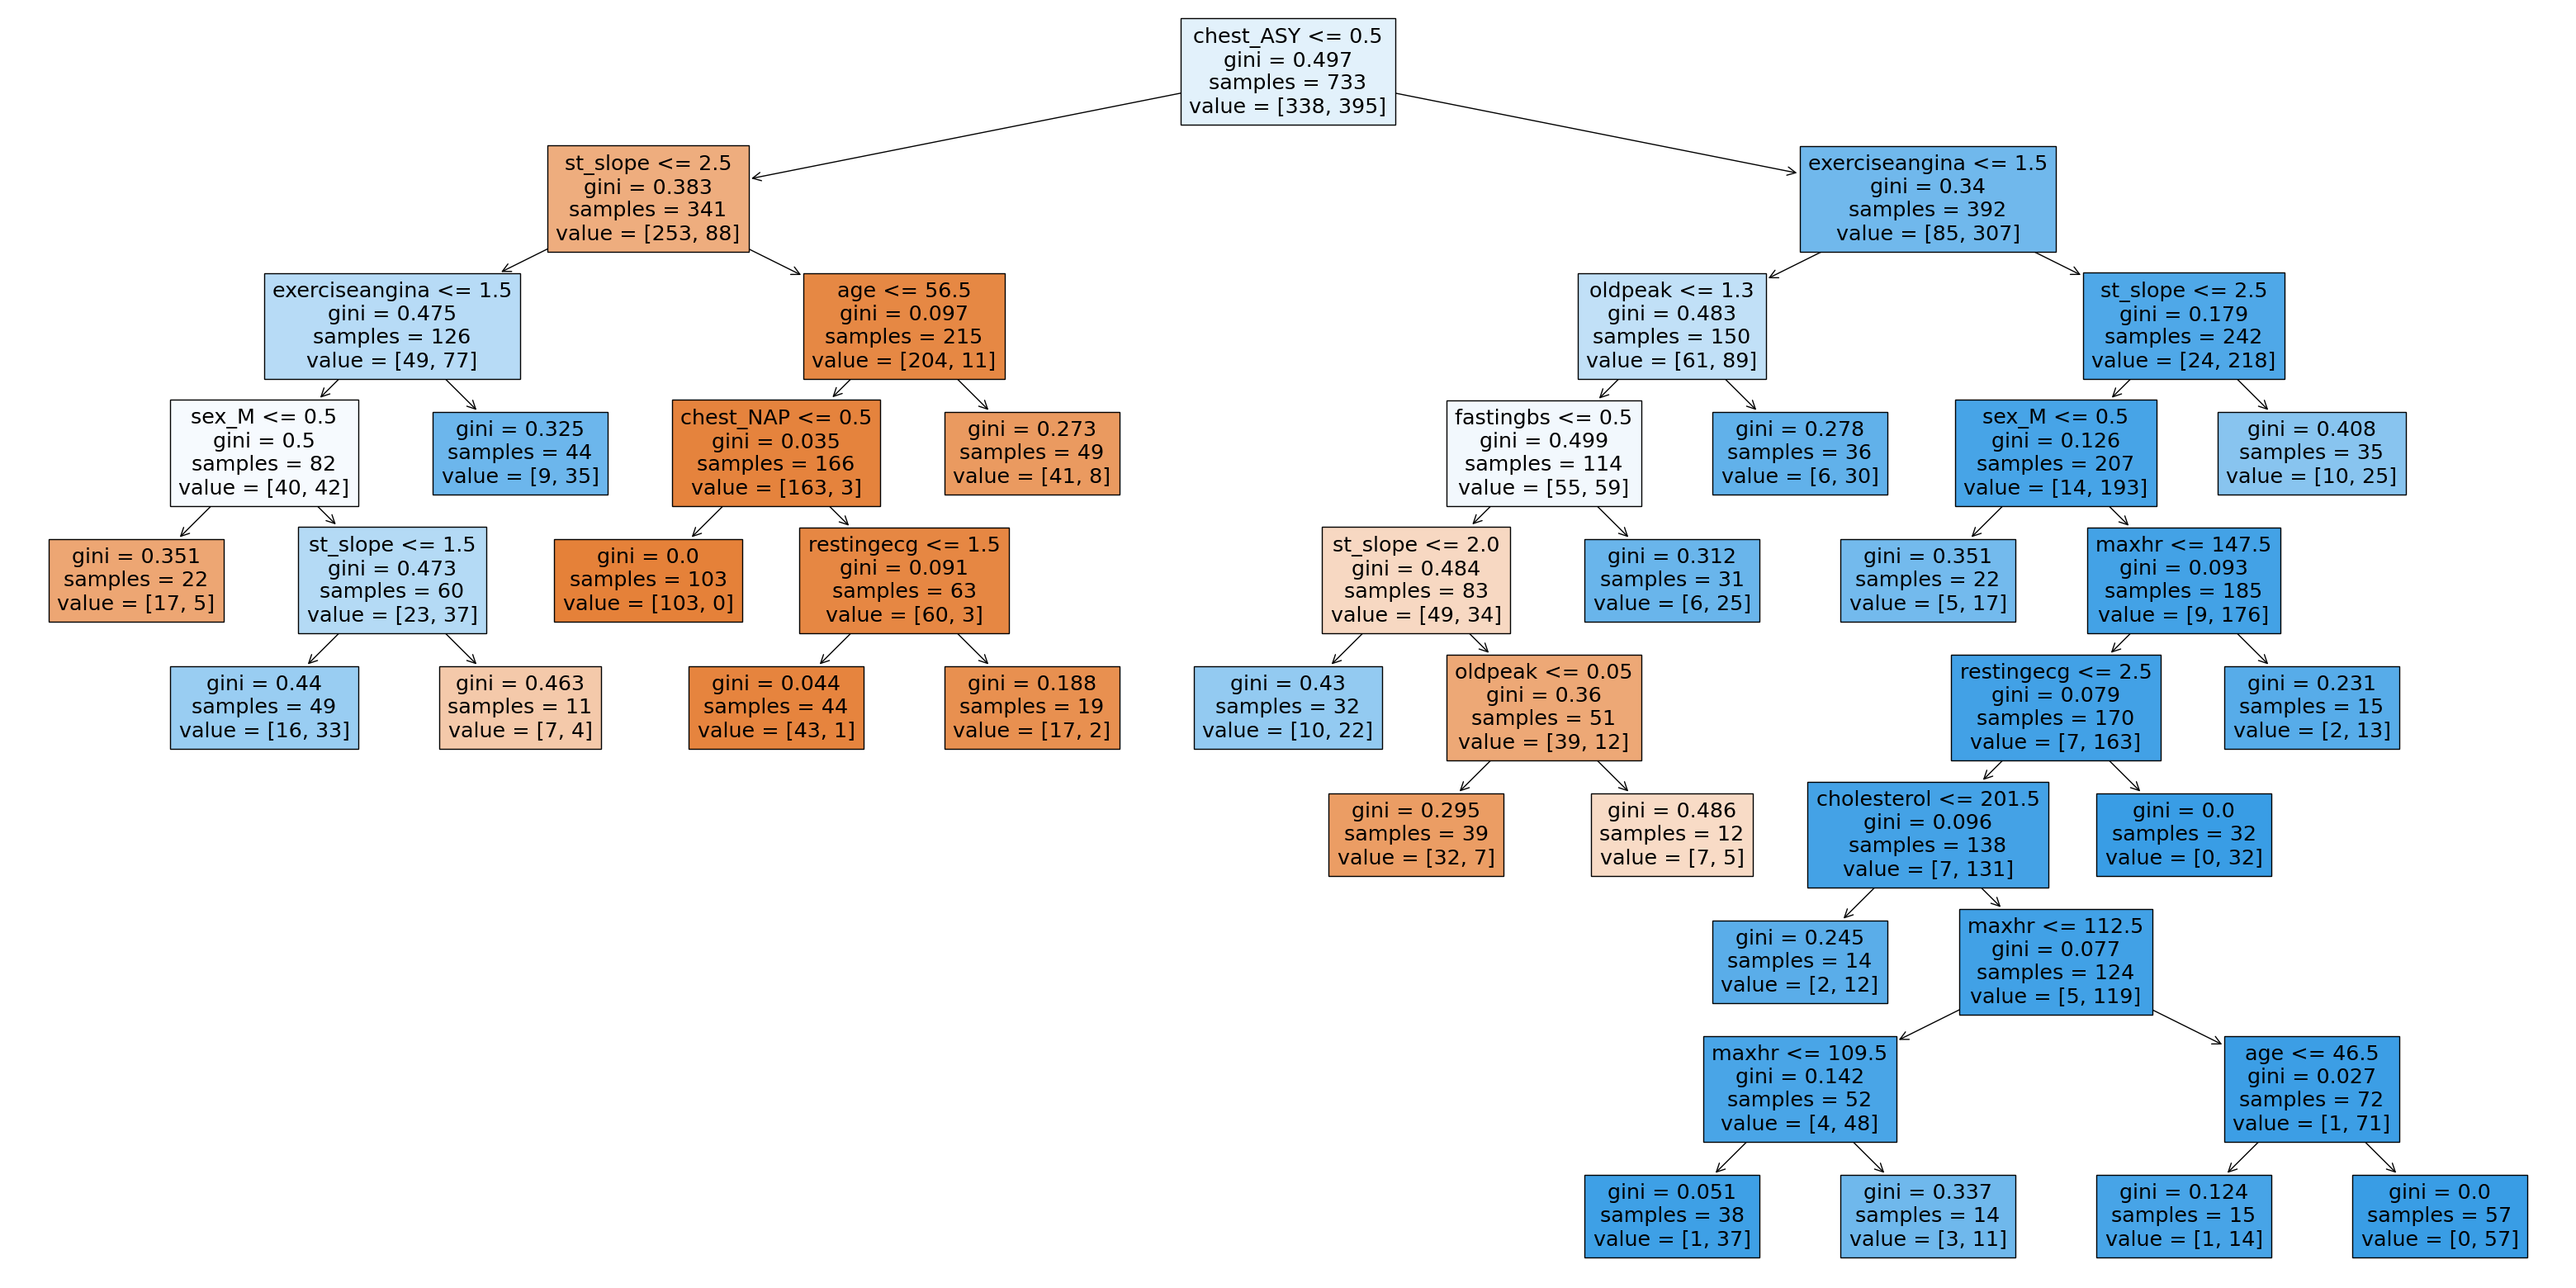

In [91]:
# veamos ahora nuestro arbol

fig = plt.figure(figsize=(40, 20))
tree.plot_tree(mejor_modelo2, feature_names=x_train2.columns, filled=True);

### 2.2 Calculad las métricas a nuestro nuevo modelo.

In [119]:
# hacemos las predicciones sobre los dos set de datos el X_test y el X_train
y_pred_test_esta2 = mejor_modelo2.predict(x_test2)
y_pred_train_esta2 = mejor_modelo2.predict(x_train2)

In [120]:
# sacamos las métricas para ver si hay overfitting o unerfitting, para modificar la profundidad en función de estos resultados

dt_results2 = metricas(y_test2, y_pred_test_esta2, y_train2, y_pred_train_esta2, "Decission Tree  II")
dt_results2

,accuracy,precision,recall,f1,kapppa,set,modelo
0,0.875000,0.893805,0.901786,0.897778,0.736947,test,Decission Tree II
1,0.859482,0.836406,0.918987,0.875754,0.714880,train,Decission Tree II


---

### 3. Comparad las métricas con el modelo hecho hasta ahora. ¿Cuál es mejor?

In [121]:
metricas_3= pd.concat([metricas_2,dt_results2],axis=0).reset_index(drop=True)
metricas_3

,accuracy,precision,recall,f1,kapppa,set,modelo
0,0.847826,0.849315,0.861111,0.855172,0.694883,test,Regresión logistica Est-Cod
1,0.868955,0.890756,0.876033,0.883333,0.733891,train,Regresión logistica Est-Cod
2,0.865942,0.885057,0.900585,0.892754,0.714046,test,Regresión logistica Cod
3,0.861154,0.862170,0.875000,0.868538,0.721447,train,Regresión logistica Cod
4,0.798913,0.857143,0.803571,0.829493,0.585080,test,Decision tree Esta I
5,0.849932,0.843373,0.886076,0.864198,0.696743,train,Decision tree Esta I
6,0.875000,0.893805,0.901786,0.897778,0.736947,test,Decission Tree II
7,0.859482,0.836406,0.918987,0.875754,0.714880,train,Decission Tree II


`Vamos a dejar en el cuadro solo las metricas de Regresion Logistica Cod y Decision Tree II (datos codificados SIN estandarizar), que son las que vemos mejor se ajustan al modelo.`

In [122]:
metricas_3.drop([0,1,4,5], axis=0, inplace=True) #Eliminamos el resto de los modelos
metricas_3

,accuracy,precision,recall,f1,kapppa,set,modelo
2,0.865942,0.885057,0.900585,0.892754,0.714046,test,Regresión logistica Cod
3,0.861154,0.862170,0.875000,0.868538,0.721447,train,Regresión logistica Cod
6,0.875000,0.893805,0.901786,0.897778,0.736947,test,Decission Tree II
7,0.859482,0.836406,0.918987,0.875754,0.714880,train,Decission Tree II


In [124]:
metricas_3.style.background_gradient()

,accuracy,precision,recall,f1,kapppa,set,modelo
2,0.865942,0.885057,0.900585,0.892754,0.714046,test,Regresión logistica Cod
3,0.861154,0.862170,0.875000,0.868538,0.721447,train,Regresión logistica Cod
6,0.875000,0.893805,0.901786,0.897778,0.736947,test,Decission Tree II
7,0.859482,0.836406,0.918987,0.875754,0.714880,train,Decission Tree II


In [123]:
metricas_3.to_csv("../files_rl/2-metricas-rl.csv")#Guardamos el df de las metricas

### `Conclusión:`

Vemos que de todos los modelos aplicados los dos que arrojan mejores resultados en sus metricas son:
- Regresión Logistica Cod
- Decission Tree II

Al comparar los mismo observamos que DT II tiene una precisión un 1% mayor al otro modelo, y un recall 0.12% mejor. El indicador kappa del modelo decision tree II es 2% mayor que el de regresion logistica cod, por lo que es mejor la concordancia en el primer modelo.

Para nuestro análisis es prioritario el análisis del recall, ya que nos interesa  analizar los falsos negativos(que me diga que tiene cardiopatía cuando en realidad el corazon es normal), vemos que existe una diferencia no significativa entre los dos modelos por lo que para definir que modelo se ajusta mejor nos quedaremos con el de mayor kappa que es el Decision Tree II.





`Observacion Adicional:`

Dado que las diferecias en el recall son minimas en los dos modelos, vamos a proceder a analizar la especificidad.

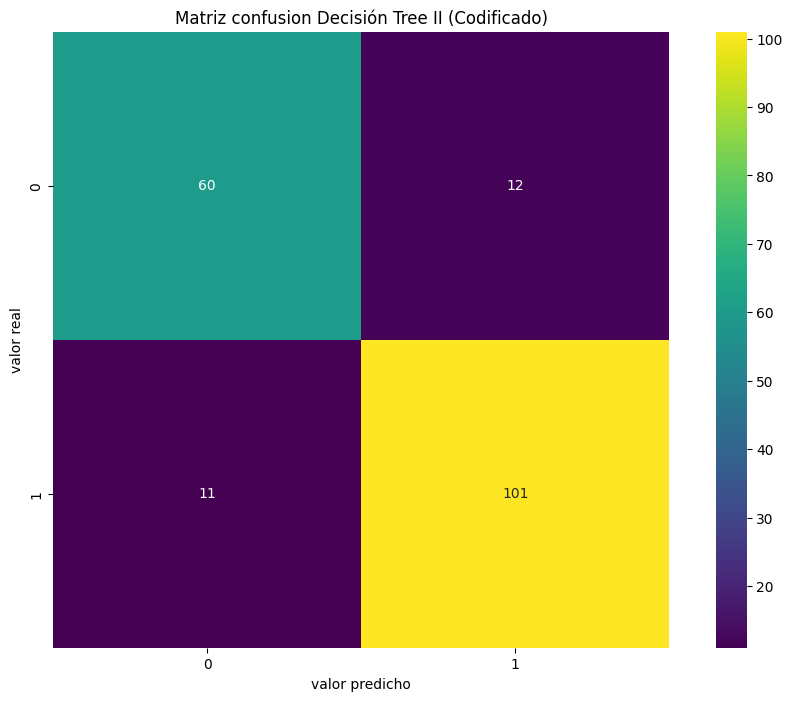

In [98]:
mat_lr2 = confusion_matrix(y_test2, y_pred_test_esta2)

plt.figure(figsize = (12, 8))
sns.heatmap(mat_lr2, square=True, annot=True, fmt="d", cmap = "viridis")

plt.xlabel('valor predicho')
plt.ylabel('valor real')
plt.title("Matriz confusion Decisión Tree II (Codificado)")
plt.show()

### Matriz confusión Regresión Logistica  Cod

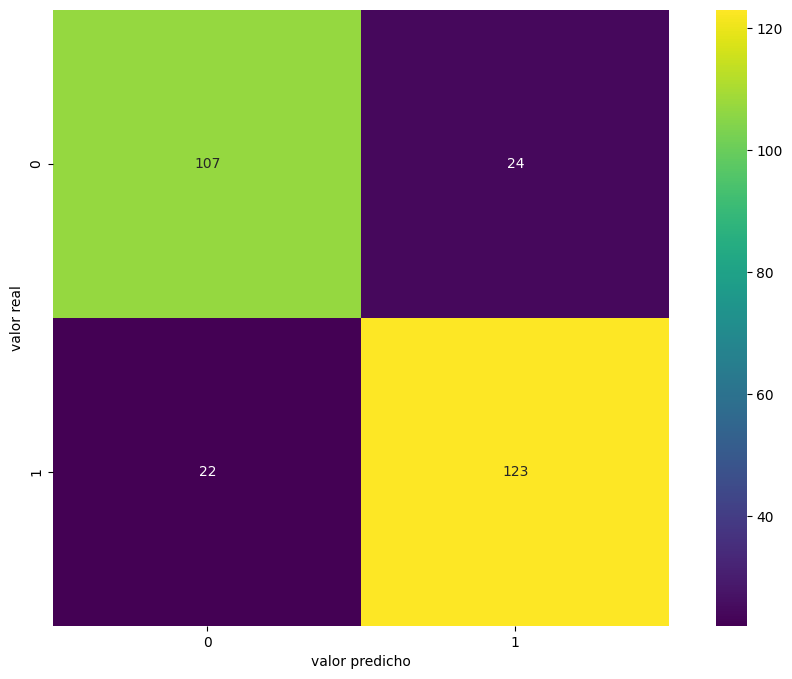

`Especificidad`

In [99]:
#Decision tree II

+101/(101+11)

0.9017857142857143

In [100]:
#Regresion logistica Cod
+123/(123+22)

0.8482758620689655

`Confirmamos que el modelo Decision Tree II  es mejor ya que la especificidad es mas alta en un porcentaje del 6%.`